# Neural Network Assignment 

## Datasets - Forestfire

In [1]:
import pandas as pd
import numpy as np 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import keras 
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential
from keras.layers import Dense

#### Load The data set

In [2]:
data=pd.read_csv("forestfires (1).csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
data.shape

(517, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

### Check the duplicates value  

In [7]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
data1=data.drop_duplicates()
data1.shape

(509, 31)

### Drop unused  columns

In [9]:
data2=data1.drop(data1.columns[10:30],axis=1)
data2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


#### convert the categorical value of size_category  into the numerical integer value 

In [10]:

from sklearn import preprocessing 
label_encoder=preprocessing.LabelEncoder()
data2["size_category"]=label_encoder.fit_transform(data2["size_category"])
data2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


#### Convert the  Categorical value of Day and Month into integer

In [11]:
data2.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),
                    (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
data2.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [12]:
data2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


In [13]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### Visualized the data 

In [14]:
import warnings
warnings.filterwarnings("ignore")

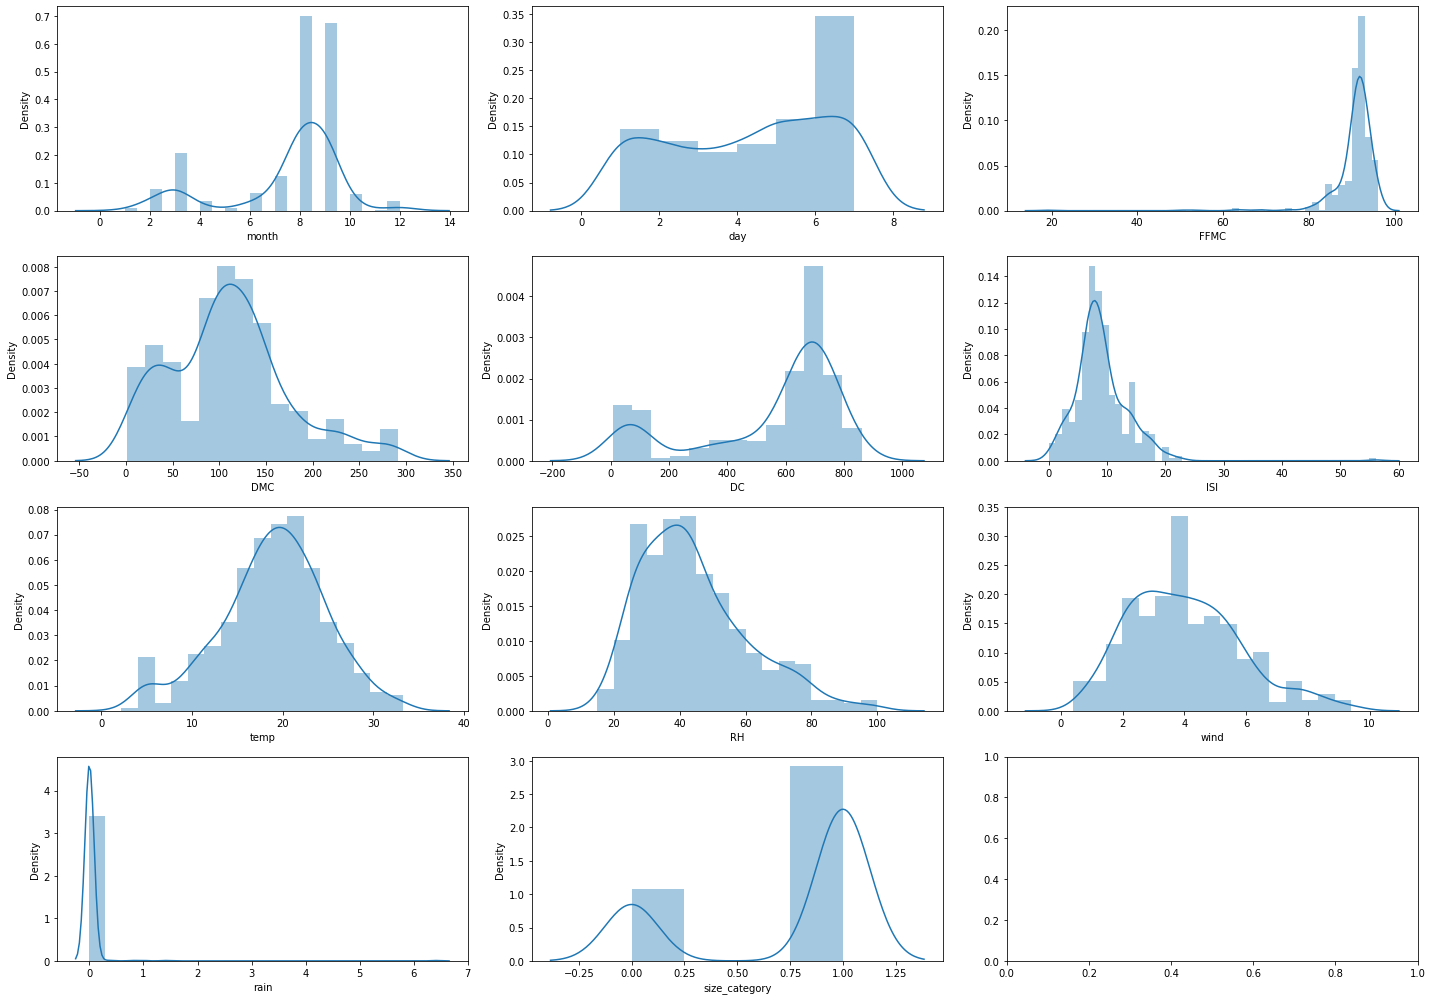

In [15]:
fig,ax=plt.subplots(4,3, figsize=(20,14))
sns.distplot(data2.month  , ax=ax[0,0])
sns.distplot(data2.day   , ax=ax[0,1])
sns.distplot(data2.FFMC   , ax=ax[0,2])
sns.distplot(data2.DMC  , ax= ax[1,0])
sns.distplot(data2.DC , ax=ax[1,1])
sns.distplot(data2.ISI, ax=ax[1,2])
sns.distplot(data2.temp, ax=ax[2,0])
sns.distplot(data2.RH, ax =ax[2,1])
sns.distplot(data2.wind, ax=ax[2,2])
sns.distplot(data2.rain, ax=ax[3,0])
sns.distplot(data2["size_category"],ax=ax[3,1])
plt.tight_layout()
plt.show()


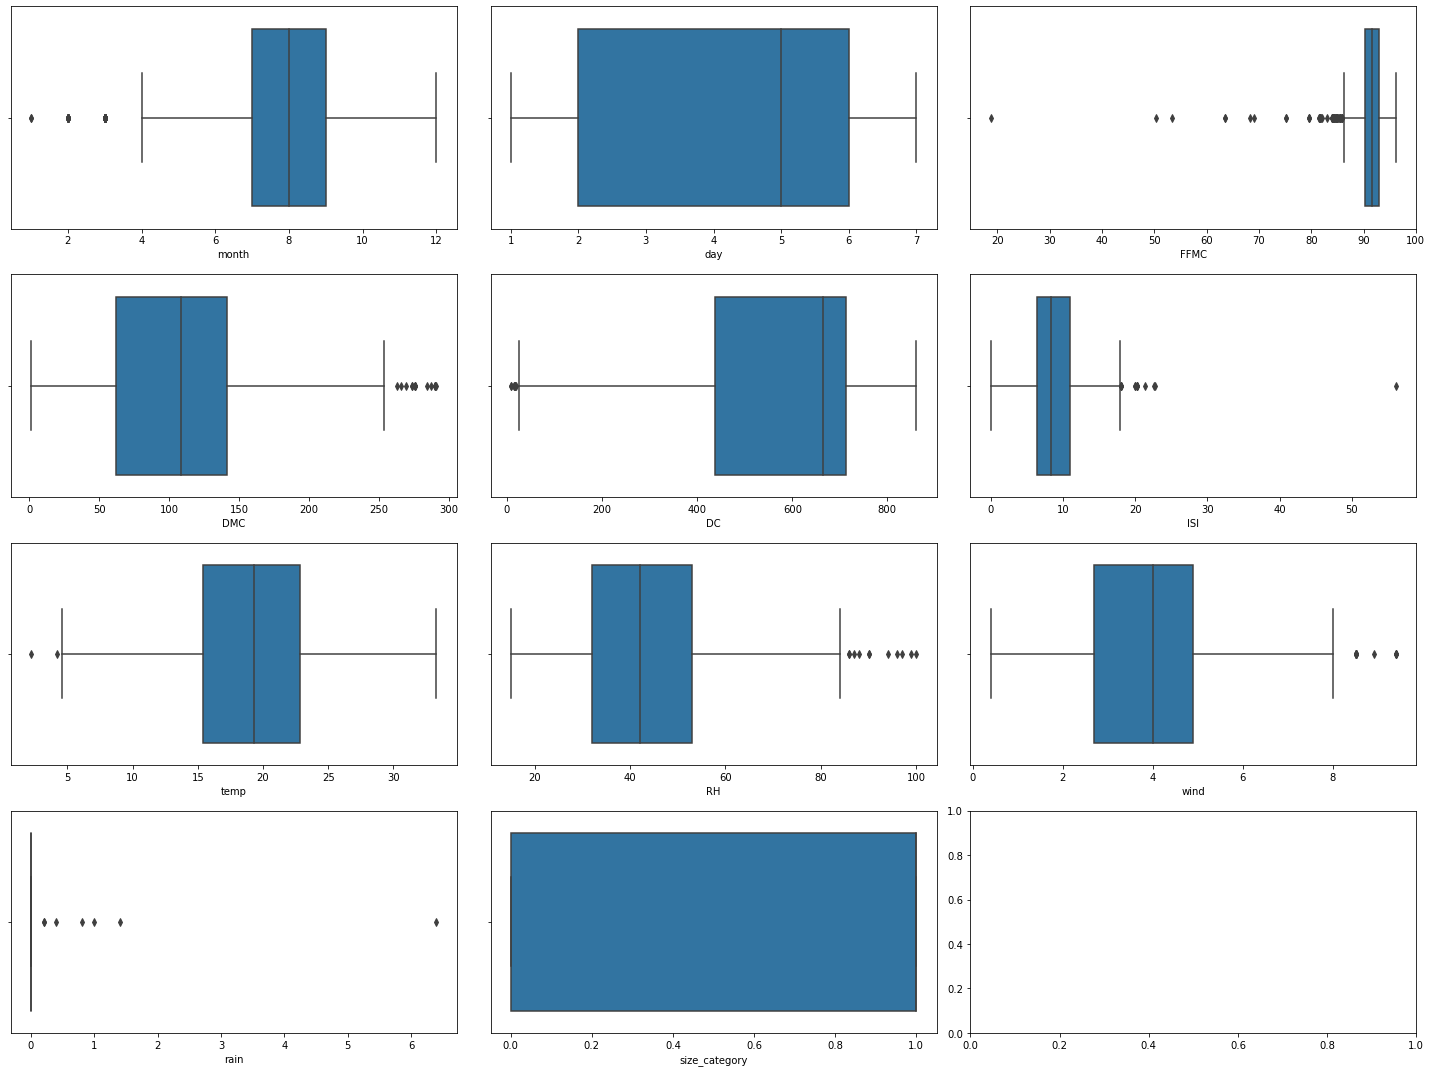

In [16]:
 # cheacking the outlier using the boxplot 
fig,ax=plt.subplots(4,3,figsize=(20,15))
sns.boxplot(data2.month, ax=ax[0,0])
sns.boxplot(data2.day, ax=ax[0,1])
sns.boxplot(data2.FFMC , ax=ax[0,2])
sns.boxplot(data2.DMC  , ax=ax[1,0])
sns.boxplot(data2.DC, ax=ax[1,1])
sns.boxplot(data2.ISI , ax= ax[1,2])
sns.boxplot(data2.temp , ax=ax[2,0])
sns.boxplot(data2.RH , ax=ax[2,1])
sns.boxplot(data.wind, ax=ax[2,2])
sns.boxplot(data2.rain, ax=ax[3,0])
sns.boxplot(data2["size_category"],ax=ax[3,1])
 
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data2=pd.DataFrame(scaler.fit_transform(data2))
data2

,0,1,2,3,4,5,6,7,8,9,10
0,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,1.0
1,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,1.0
2,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,1.0
3,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,1.0
4,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
504,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.0
505,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.0
506,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.0
507,0.636364,0.833333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,1.0


### Independent and Dependent Variables

In [18]:
X = data2.iloc[:,0:10].values
Y = data2.iloc[:,-1].values

In [19]:
X

array([[0.18181818, 0.66666667, 0.87096774, ..., 0.42352941, 0.7       ,
        0.        ],
       [0.81818182, 0.16666667, 0.92774194, ..., 0.21176471, 0.05555556,
        0.        ],
       [0.81818182, 0.83333333, 0.92774194, ..., 0.21176471, 0.1       ,
        0.        ],
       ...,
       [0.63636364, 1.        , 0.8116129 , ..., 0.64705882, 0.7       ,
        0.        ],
       [0.63636364, 0.83333333, 0.97677419, ..., 0.31764706, 0.4       ,
        0.        ],
       [0.90909091, 0.16666667, 0.78451613, ..., 0.18823529, 0.45555556,
        0.        ]])

In [20]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
seed

7

#### Create Model

In [24]:

# Create model
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [26]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [27]:
# Fit the model
model.fit(X,Y, validation_split=0.33, epochs=100,batch_size=10)


Epoch 1/100
35/35 [==============================] - 1s 13ms/step - loss: 0.7146 - accuracy: 0.2434 - val_loss: 0.5677 - val_accuracy: 0.3274
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.2434 - val_loss: 0.2853 - val_accuracy: 0.3393
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.6334 - val_loss: 0.2613 - val_accuracy: 0.6667
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1932 - accuracy: 0.7537 - val_loss: 0.2510 - val_accuracy: 0.6667
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 0.7566 - val_loss: 0.2498 - val_accuracy: 0.6667
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1922 - accuracy: 0.7537 - val_loss: 0.2482 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1917 - accuracy: 0.7537 - val_loss: 0.2506 - val_accuracy: 0.6726
Epoch 8/100


Epoch 59/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1784 - accuracy: 0.7683 - val_loss: 0.2408 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.7713 - val_loss: 0.2553 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1778 - accuracy: 0.7713 - val_loss: 0.2475 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1779 - accuracy: 0.7713 - val_loss: 0.2573 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1794 - accuracy: 0.7713 - val_loss: 0.2432 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.7713 - val_loss: 0.2481 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1794 - accuracy: 0.7713 - val_loss: 0.2498 - val_accuracy: 0.6726
Epoch 

In [28]:
# Evaluate the model
scores = model.evaluate(X,Y)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.7446
accuracy: 74.46%


In [31]:
history = model.fit(X,Y, validation_split=0.33 , epochs=100 , batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1769 - accuracy: 0.7771 - val_loss: 0.2609 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1749 - accuracy: 0.7771 - val_loss: 0.2604 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1748 - accuracy: 0.7771 - val_loss: 0.2588 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1776 - accuracy: 0.7713 - val_loss: 0.2699 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.7771 - val_loss: 0.2635 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1745 - accuracy: 0.7801 - val_loss: 0.2593 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1747 - accuracy: 0.7801 - val_loss: 0.2683 - val_accuracy: 0.6726
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1740 - accuracy: 0.7771 - val_loss: 0.2688 - val_accuracy: 0.6667
Epoch 60/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1742 - accuracy: 0.7771 - val_loss: 0.2743 - val_accuracy: 0.6667
Epoch 61/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.7771 - val_loss: 0.2684 - val_accuracy: 0.6667
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1741 - accuracy: 0.7771 - val_loss: 0.2654 - val_accuracy: 0.6667
Epoch 63/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.7771 - val_loss: 0.2703 - val_accuracy: 0.6667
Epoch 64/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1743 - accuracy: 0.7771 - val_loss: 0.2798 - val_accuracy: 0.6667
Epoch 65/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1737 - accuracy: 0.7771 - val_loss: 0.2704 - val_accuracy: 0.6667
Epoch 

In [32]:
# Visualize training history

#list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

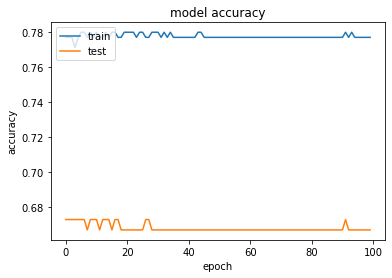

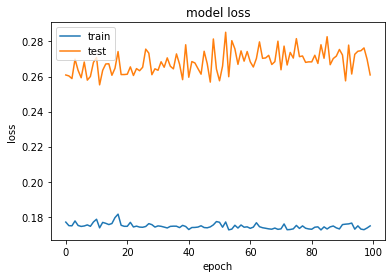

In [33]:
# Summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Tuning of Hyperparameters:- Batch size and Epochs


In [34]:
 # Importing necessary libraries

from sklearn.model_selection import GridSearchCV , KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [35]:
# Create model

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
    
    adam =Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model


In [36]:
# Create the model
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size, epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose =10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   1.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.765 total time=   1.6s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.510 total time=   1.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.676 total time=   1.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.693 total time=   1.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.765 total time=   2.9s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.510 total time=   2.8s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.676 total time=   3.0s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.663 total time=   2.9s


In [37]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{}, {} with :{}'. format(mean, stdev, param))

Best : 0.728809940814972, using {'batch_size': 10, 'epochs': 10}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 10, 'epochs': 10}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 10, 'epochs': 50}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 10, 'epochs': 100}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 20, 'epochs': 10}
0.7268297433853149, 0.15974927518924567 with :{'batch_size': 20, 'epochs': 50}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 20, 'epochs': 100}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 40, 'epochs': 10}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 40, 'epochs': 50}
0.7228693485260009, 0.16102298906717666 with :{'batch_size': 40, 'epochs': 100}


# Gas_Turbines

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import keras 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from  keras.layers import Dense

In [59]:
gas_data=pd.read_csv("gas_turbines (1).csv")
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [61]:
gas_data.shape

(15039, 11)

In [62]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [64]:
gas_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [65]:

gas_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [67]:

gas_data[gas_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [68]:
import warnings
warnings.filterwarnings("ignore")

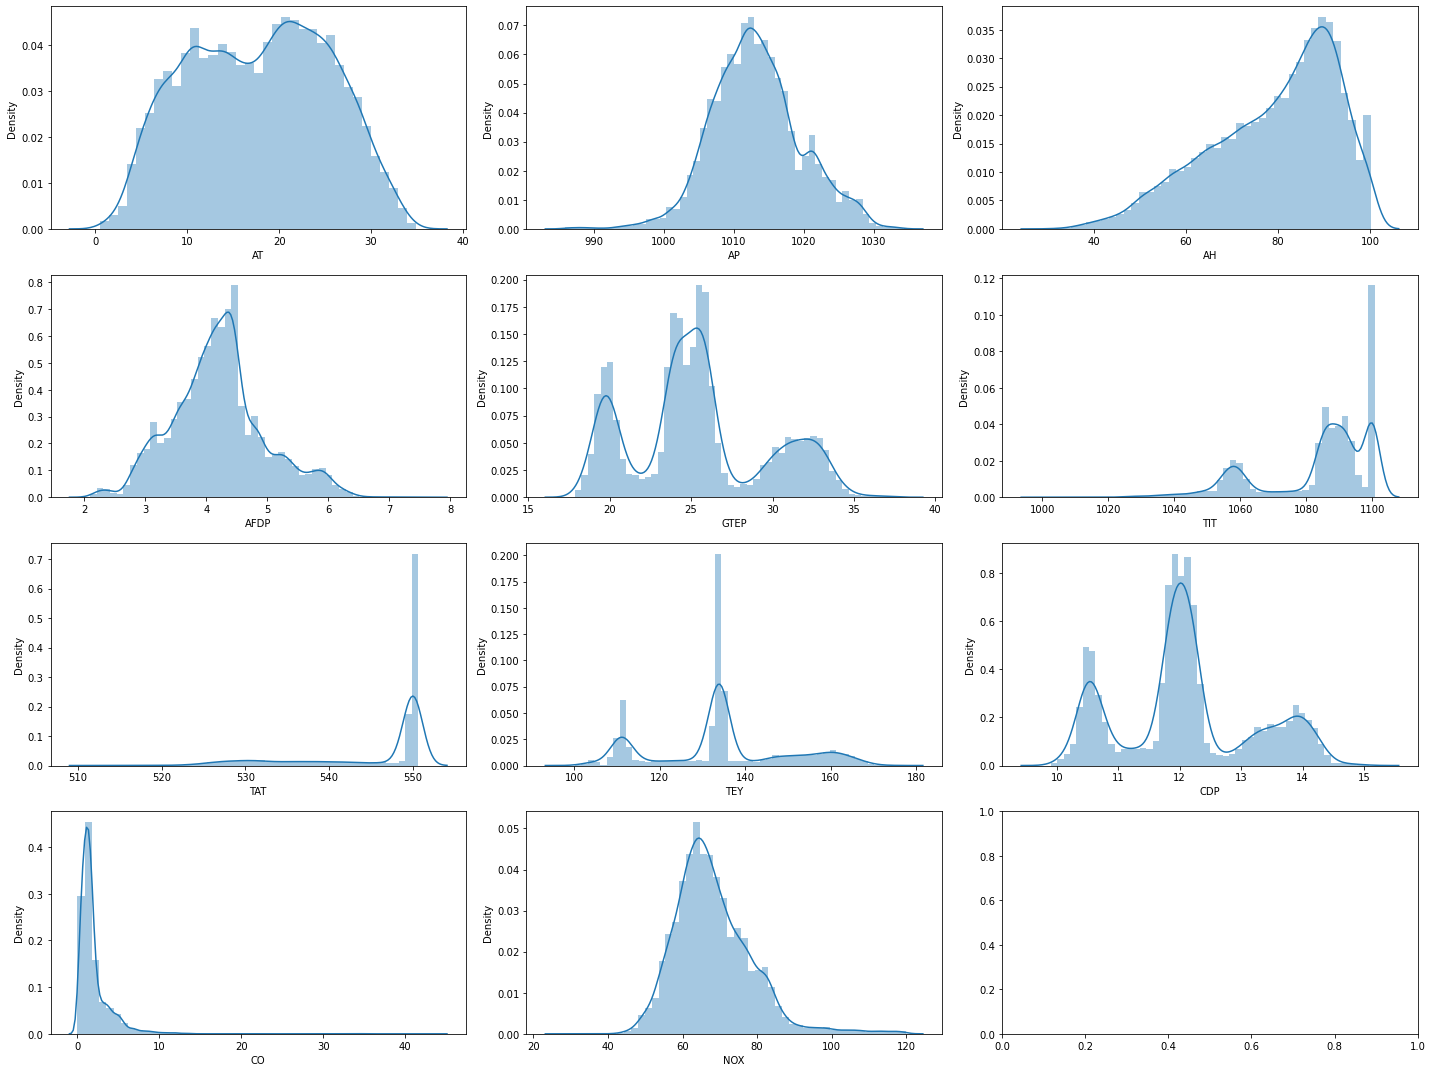

In [72]:
fig,ax=plt.subplots(4,3, figsize=(20,15))
sns.distplot(gas_data.AT,ax=ax[0,0])
sns.distplot(gas_data.AP, ax=ax[0,1])
sns.distplot(gas_data.AH, ax=ax[0,2])
sns.distplot(gas_data.AFDP,ax=ax[1,0])
sns.distplot(gas_data.GTEP, ax=ax[1,1])
sns.distplot(gas_data.TIT , ax=ax[1,2])
sns.distplot(gas_data.TAT , ax=ax[2,0])
sns.distplot(gas_data.TEY , ax=ax[2,1])
sns.distplot(gas_data.CDP , ax=ax[2,2])
sns.distplot(gas_data.CO  , ax=ax[3,0])
sns.distplot(gas_data.NOX , ax=ax[3,1])

plt.tight_layout()
plt.show()

In [54]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


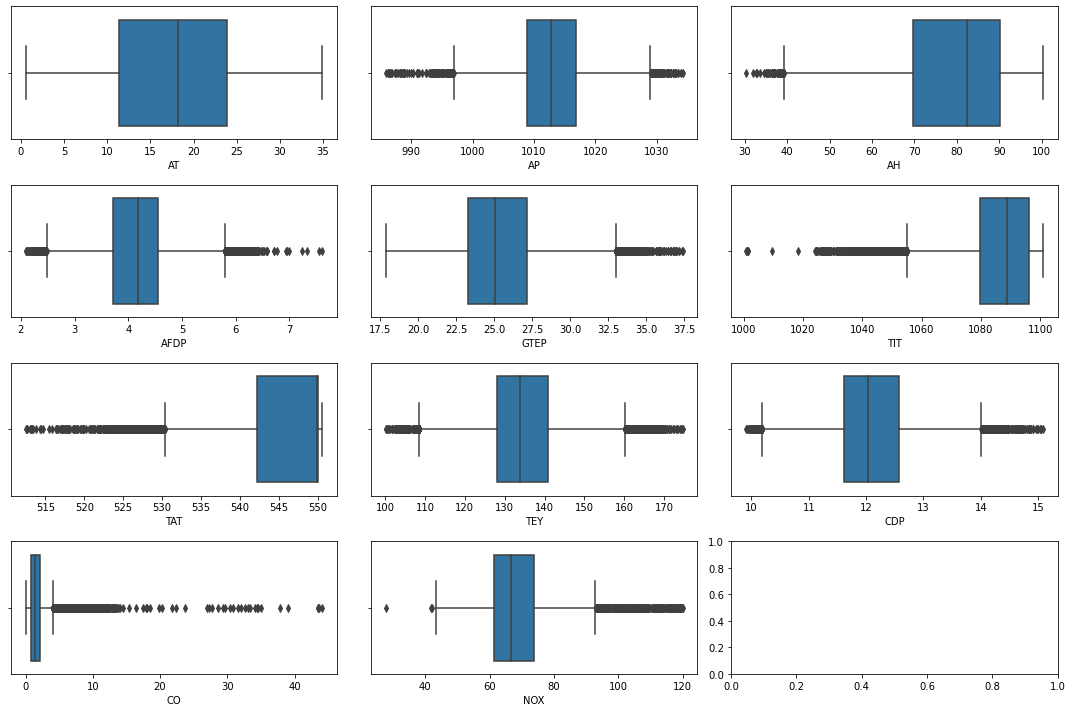

In [73]:
# Checking outliers

fig, ax = plt.subplots(4,3, figsize = (15,10))

sns.boxplot(gas_data.AT, ax = ax[0,0])
sns.boxplot(gas_data.AP, ax = ax[0,1])
sns.boxplot(gas_data.AH, ax = ax[0,2])
sns.boxplot(gas_data.AFDP, ax = ax[1,0])
sns.boxplot(gas_data.GTEP, ax = ax[1,1])
sns.boxplot(gas_data.TIT, ax = ax[1,2])
sns.boxplot(gas_data.TAT, ax = ax[2,0])
sns.boxplot(gas_data.TEY, ax = ax[2,1])
sns.boxplot(gas_data.CDP, ax = ax[2,2])
sns.boxplot(gas_data.CO, ax = ax[3,0])
sns.boxplot(gas_data.NOX, ax = ax[3,1])

plt.tight_layout()
plt.show()


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data1=pd.DataFrame(scaler.fit_transform(gas_data))

In [75]:
data1

,0,1,2,3,4,5,6,7,8,9,10
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [76]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(gas_data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [78]:
# Extracting independent and dependent variables
X=data1.drop(axis=0,columns="TEY").values
Y=data1["TEY"].values

In [79]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [80]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [81]:
keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None)
keras.metrics.MeanSquaredError()

In [82]:
# Fix random seed for reproducibility

seed = 7
np.random.seed(seed)

In [83]:
# Create model

model = Sequential()
model.add(Dense(12, input_dim =10, kernel_initializer = 'uniform', activation ='relu'))
model.add(Dense(8, kernel_initializer ='uniform', activation ='relu'))
model.add(Dense(1, kernel_initializer ='uniform', activation ='relu'))

In [84]:
# Compile model

model.compile(loss = 'mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError()]) 

In [85]:
# Fit the model
history = model.fit(X,Y, validation_split=0.33, epochs =100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 2.3843e-04 - val_mean_squared_error: 2.3843e-04
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.4545e-04 - mean_squared_error: 2.4545e-04 - val_loss: 1.7615e-04 - val_mean_squared_error: 1.7615e-04
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.7689e-04 - mean_squared_error: 1.7689e-04 - val_loss: 1.4614e-04 - val_mean_squared_error: 1.4614e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.5354e-04 - mean_squared_error: 1.5354e-04 - val_loss: 1.2973e-04 - val_mean_squared_error: 1.2973e-04
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.3847e-04 - mean_squared_error: 1.3847e-04 - val_loss: 1.2544e-04 - val_mean_squared_error: 1.2544e-04
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.3612e-04 - mean_squared_

1008/1008 [==============================] - 2s 2ms/step - loss: 1.1464e-04 - mean_squared_error: 1.1464e-04 - val_loss: 2.2200e-04 - val_mean_squared_error: 2.2200e-04
Epoch 47/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0772e-04 - mean_squared_error: 1.0772e-04 - val_loss: 1.0738e-04 - val_mean_squared_error: 1.0738e-04
Epoch 48/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1091e-04 - mean_squared_error: 1.1091e-04 - val_loss: 1.2201e-04 - val_mean_squared_error: 1.2201e-04
Epoch 49/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1106e-04 - mean_squared_error: 1.1106e-04 - val_loss: 9.9845e-05 - val_mean_squared_error: 9.9845e-05
Epoch 50/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.1265e-04 - mean_squared_error: 1.1265e-04 - val_loss: 9.8274e-05 - val_mean_squared_error: 9.8274e-05
Epoch 51/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.1132e-04 - mean_squared

1008/1008 [==============================] - 2s 2ms/step - loss: 1.0541e-04 - mean_squared_error: 1.0541e-04 - val_loss: 1.0339e-04 - val_mean_squared_error: 1.0339e-04
Epoch 92/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0423e-04 - mean_squared_error: 1.0423e-04 - val_loss: 1.0305e-04 - val_mean_squared_error: 1.0305e-04
Epoch 93/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0586e-04 - mean_squared_error: 1.0586e-04 - val_loss: 9.5958e-05 - val_mean_squared_error: 9.5958e-05
Epoch 94/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0190e-04 - mean_squared_error: 1.0190e-04 - val_loss: 1.2971e-04 - val_mean_squared_error: 1.2971e-04
Epoch 95/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0234e-04 - mean_squared_error: 1.0234e-04 - val_loss: 1.0161e-04 - val_mean_squared_error: 1.0161e-04
Epoch 96/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0448e-04 - mean_squared

In [86]:
# evaluate the model
scores = model.evaluate(X,Y)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 1.3604e-04 - mean_squared_error: 1.3604e-04
mean_squared_error: 0.01%


In [87]:
### Tuning of Hyperparameter :- Batch size and epochs

In [88]:
# Importing the necessary  libraries
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

In [90]:
# Create model

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim= 10, kernel_initializer= 'uniform', activation= 'relu'))
    model.add(Dense(8, kernel_initializer= 'uniform', activation= 'relu'))
    model.add(Dense(1, kernel_initializer= 'uniform', activation='relu'))
    # This last layer should be changed to 'relu' as sigmoid is used for classification problems.
    
    adam = Adam(lr =0.01)
    
    model.compile(loss= 'mse', optimizer= adam, metrics= [keras.metrics.MeanSquaredError()])  
    # metrics= ['accuracy'] changed to [keras.metrics.MeanSquaredError()] as the Y variable is continuous datatype.
    return model

In [93]:
# Create the model

model= KerasRegressor(build_fn = create_model, verbose = 0)   # the Y variable is a continuous data type where you've to apply the keras regressor model to it

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dicitionary of the grid search parameters

param_grid = dict(batch_size = batch_size, epochs = epochs)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  13.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  13.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.317 total time=  11.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.264 total time=  12.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  12.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, 

In [94]:

# Summarize the results

print('Best :{}, using {}'. format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with:{}'. format(mean, stdev, param))

Best :-0.00016508220287505537, using {'batch_size': 20, 'epochs': 50}
-0.11615776321123121,0.14307759141274845 with:{'batch_size': 10, 'epochs': 10}
-0.03574126762832748,0.07100441609046813 with:{'batch_size': 10, 'epochs': 50}
-0.10779121281666448,0.1350898367074587 with:{'batch_size': 10, 'epochs': 100}
-0.06359845236002001,0.12656486082815507 with:{'batch_size': 20, 'epochs': 10}
-0.00016508220287505537,7.318464565705704e-05 with:{'batch_size': 20, 'epochs': 50}
-0.052827439377142585,0.10540286582769158 with:{'batch_size': 20, 'epochs': 100}
-0.0002089449219056405,9.454186412815808e-05 with:{'batch_size': 40, 'epochs': 10}
-0.05823840689554345,0.1162596875035283 with:{'batch_size': 40, 'epochs': 50}
-0.10769195062166545,0.13516878937038934 with:{'batch_size': 40, 'epochs': 100}
